<a href="https://colab.research.google.com/github/veeralakshmi-coder/FMML-2024/blob/main/FMML_Module4_Lab1_June2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [2]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [3]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [4]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

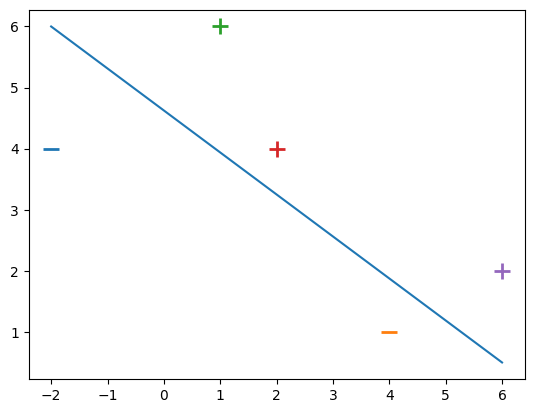

In [5]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

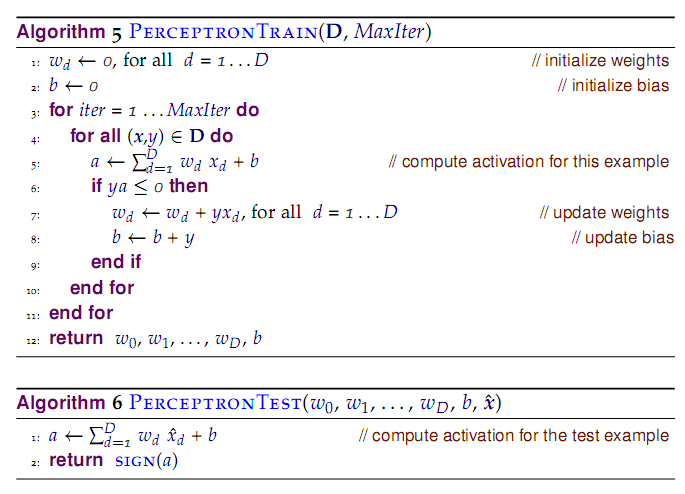

The algorithm is shown in the above image.

In [6]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [7]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

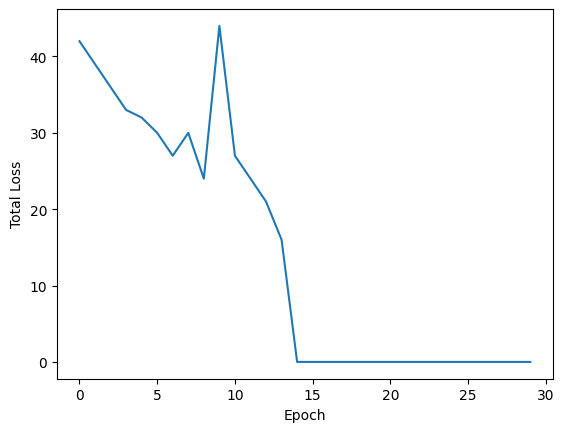

In [8]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

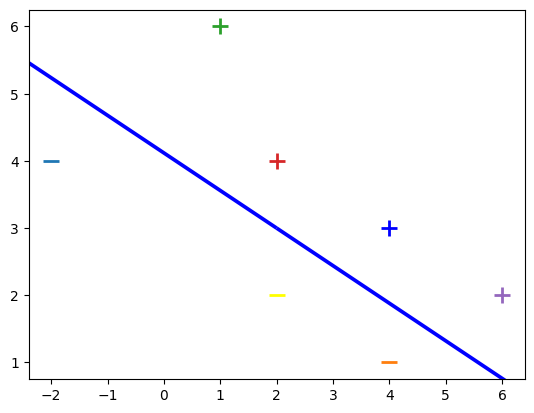

In [9]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



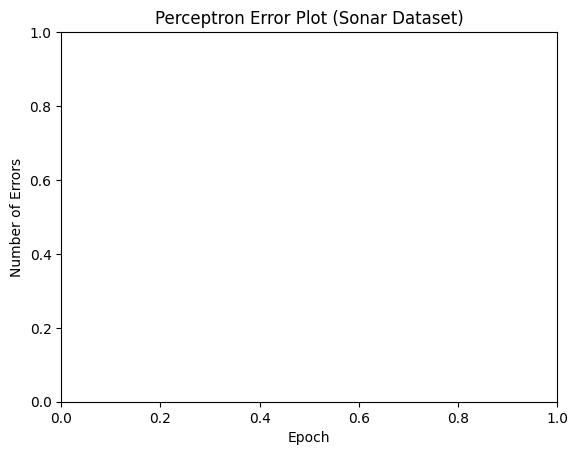

In [14]:
#ANSWER 1

from sklearn.datasets import fetch_openml
sonar = fetch_openml(name='sonar', version=1, as_frame=False)
X = sonar.data
y = sonar.target
# Add bias term
X = np.c_[X, np.ones(X.shape[0])]

# Convert labels to -1 and 1
y = np.where(y == 'R', -1, 1)
def perceptron(X, y, learning_rate=0.1, epochs=100):
    """Perceptron learning algorithm."""
    num_samples = X.shape[0]
    num_features = X.shape[1]
    weights = np.zeros(num_features)
    errors = []

    for epoch in range(epochs):
        epoch_errors = 0
        for i in range(num_samples):
            prediction = np.sign(np.dot(X[i], weights))
            if prediction != y[i]:
                weights += learning_rate * y[i] * X[i]
                epoch_errors += 1
        errors.append(epoch_errors)
    return weights, errors
    weights, errors = perceptron(X, y)


plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Error Plot (Sonar Dataset)')
plt.show()

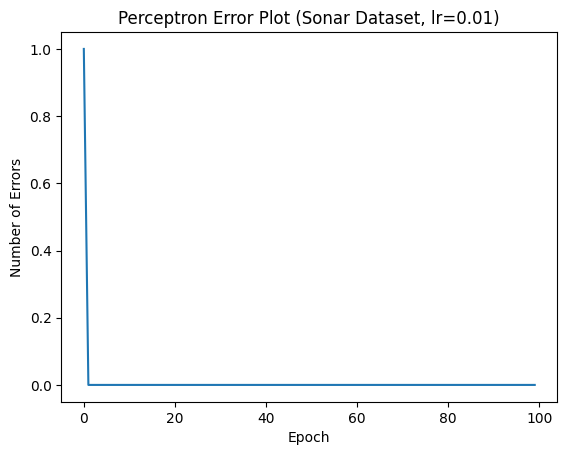

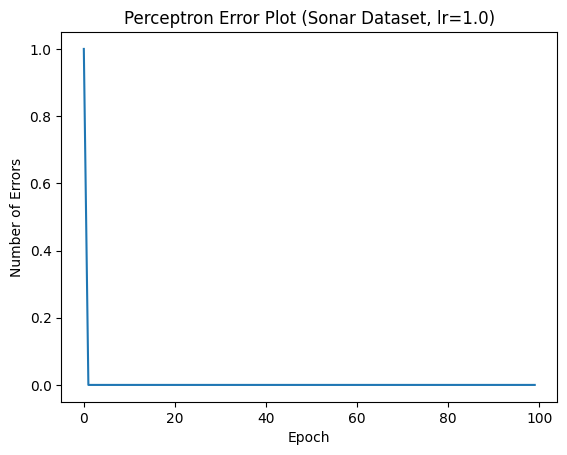

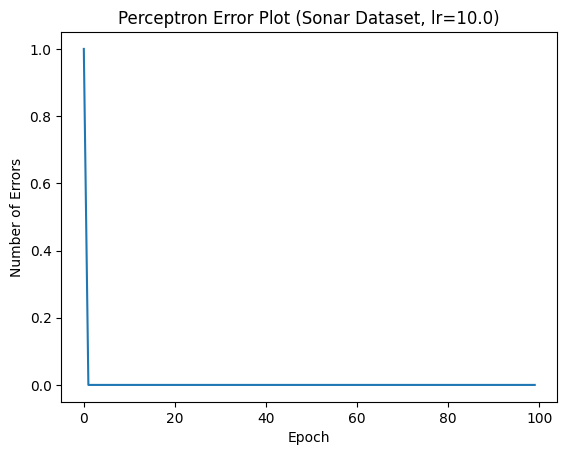

In [16]:
#ANSWER 2
weights, errors = perceptron(X, y, learning_rate=0.01, epochs=100)

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Error Plot (Sonar Dataset, lr=0.01)')
plt.show()
weights, errors = perceptron(X, y, learning_rate=1.0, epochs=100)

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Error Plot (Sonar Dataset, lr=1.0)')
plt.show()
weights, errors = perceptron(X, y, learning_rate=10.0, epochs=100)

plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.title('Perceptron Error Plot (Sonar Dataset, lr=10.0)')
plt.show()

In [10]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [11]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


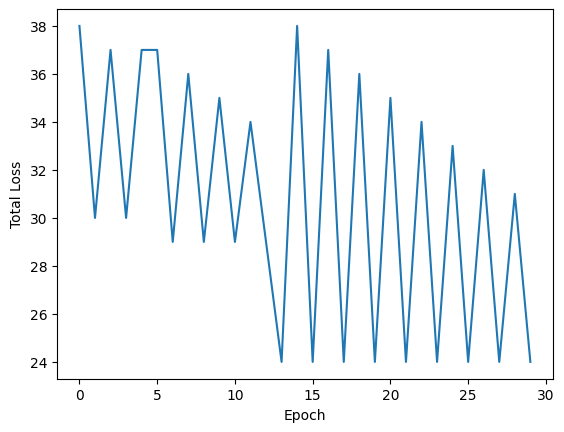

In [12]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

**aNSWER 1:-**

Dataset:

| x1 | x2 | y |
| --- | --- | --- |
| 0   | 0   | - |
| 0   | 1   | - |
| 1   | 0   | - |
| 1   | 1   | + |

Perceptron Learnability:

Yes, this dataset is learnable by a Perceptron.

Reason:

The dataset represents the Boolean AND function, which is a linearly separable problem. The Perceptron can learn linearly separable problems.

Weights Update Procedure:

Initialize:

- w0 = 0
- w1 = 0
- w2 = 0 (or b0 = 0, where w2 is the bias term)
- Learning rate η = 0.1 (or any other suitable value)

Iteration 1 (x1 = 0, x2 = 0, y = -):

- Output: ô = σ(w0_x1 + w1_x2 + w2) = σ(0 + 0 + 0) = 0 (correctly classified)
- No update needed

Iteration 2 (x1 = 0, x2 = 1, y = -):

- Output: ô = σ(w0_x1 + w1_x2 + w2) = σ(0 + 0 + 0) = 0 (correctly classified)
- No update needed

Iteration 3 (x1 = 1, x2 = 0, y = -):

- Output: ô = σ(w0_x1 + w1_x2 + w2) = σ(0 + 0 + 0) = 0 (correctly classified)
- No update needed

Iteration 4 (x1 = 1, x2 = 1, y = +):

- Output: ô = σ(w0_x1 + w1_x2 + w2) = σ(0 + 0 + 0) = 0 (misclassified)
- Update weights:
    - w0 = w0 + η_y_x1 = 0 + 0.1_1_1 = 0.1
    - w1 = w1 + η_y_x2 = 0 + 0.1_1_1 = 0.1
    - w2 = w2 + η_y = 0 + 0.1_1 = 0.1

New weights: w0 = 0.1, w1 = 0.1, w2 = 0.1

Subsequent iterations will refine the weights further.

Convergence:

The Perceptron will converge to the optimal weights after a few iterations.

Optimal Weights:

w0 ≈ 1, w1 ≈ 1, w2 ≈ -1 (or equivalent values)

These weights represent the decision boundary for the AND function.

Keep in mind that the Perceptron's convergence and optimal weights may vary depending on the learning rate η and the initial weights.

**ANSWER 2:-**

Among the 16 possible distinct Boolean functions over a 2-bit binary input, 8 are linearly separable and can be learned by a Perceptron, while 8 are not.

Learnable Boolean Functions (Linearly Separable):

1. AND
2. OR
3. NAND (¬(x1 ∧ x2))
4. NOR (¬(x1 ∨ x2))
5. x1
6. x2
7. ¬x1
8. ¬x2

Not Learnable Boolean Functions (Not Linearly Separable):

1. XOR (x1 ⊕ x2)
2. XNOR (¬(x1 ⊕ x2))
3. Equivalence (x1 ≡ x2)
4. Non-Equivalence (x1 ≠ x2)
5. (x1 ∧ ¬x2) ∨ (¬x1 ∧ x2)
6. (x1 ∨ ¬x2) ∧ (¬x1 ∨ x2)
7. (x1 ∧ x2) ∨ (¬x1 ∧ ¬x2)
8. (x1 ∨ x2) ∧ (¬x1 ∨ ¬x2)

Truth Tables for Not Learnable Boolean Functions:

XOR (x1 ⊕ x2)

| x1 | x2 | y |
| --- | --- | --- |
| 0   | 0   | 0 |
| 0   | 1   | 1 |
| 1   | 0   | 1 |
| 1   | 1   | 0 |

XNOR (¬(x1 ⊕ x2))

| x1 | x2 | y |
| --- | --- | --- |
| 0   | 0   | 1 |
| 0   | 1   | 0 |
| 1   | 0   | 0 |
| 1   | 1   | 1 |

Equivalence (x1 ≡ x2)

| x1 | x2 | y |
| --- | --- | --- |
| 0   | 0   | 1 |
| 0   | 1   | 0 |
| 1   | 0   | 0 |
| 1   | 1   | 1 |

The Perceptron cannot learn these functions because they require non-linear decision boundaries, which cannot be represented by a single hyperplane.

To learn these non-linearly separable Boolean functions, more complex models like Multi-Layer Perceptrons (MLPs) or other non-linear classifiers are required.